In [1]:
# Basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

# Import from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set a random seed
np.random.seed(42)

# Data Visualization
sns.set_theme(context='notebook', style='darkgrid', palette='bright')

In [2]:
train = pd.read_csv('datasets/clean-avg-train-combined-with-location-data.csv')
train.head()

,station_id,station_name,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,month_total,lat,long
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447,42.019063,-87.672892
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567,42.015876,-87.669092
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772,42.008362,-87.665909
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008,42.001073,-87.661061
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189,41.993664,-87.659202


#### **Preprocessing**

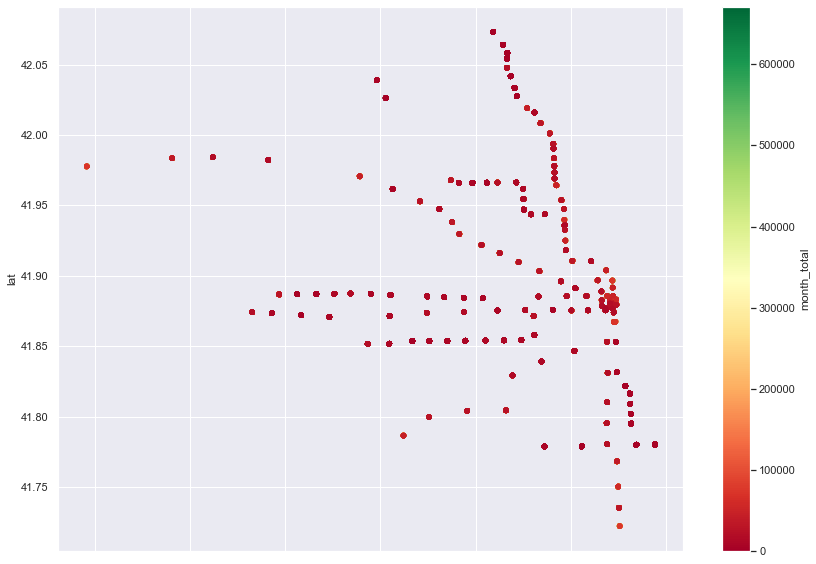

In [3]:
train.plot(kind="scatter", x="long", y="lat", c="month_total",
         cmap="RdYlGn", figsize=(14, 10));

#### **KMeans Clustering**

In [4]:
X = train[['long','lat','month_total']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [7]:
%%time
# Function to search through k clusters
scores = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

Wall time: 8min 16s


In [8]:
score_df.sort_values(by=['silhouette'], ascending=False).head(5)

,k,inertia,silhouette
28,30,4565.042921,0.429440
20,22,6530.379407,0.421831
13,15,9939.847129,0.419135
10,12,12884.984631,0.416940
25,27,5158.701751,0.416271


#### **Visualize clusters**

Text(0.5, 1.0, 'Silhouette Score over k')

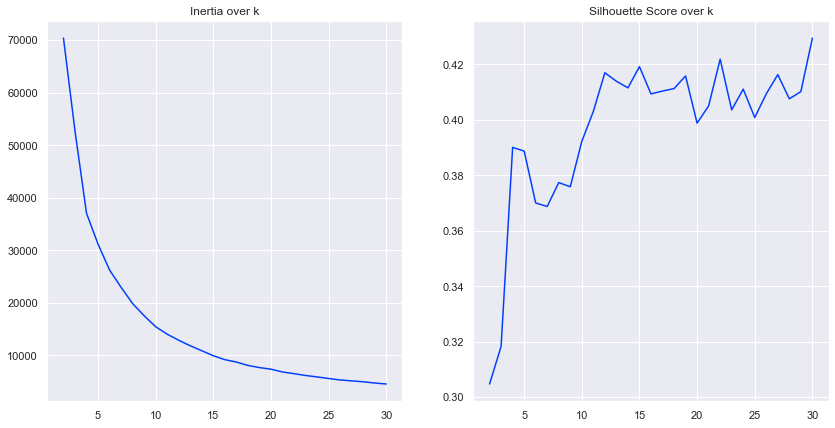

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [10]:
km = KMeans(n_clusters=30)
km.fit(X_sc)
# Scaled X gives best results
df=train.copy()
df['cluster'] = km.labels_

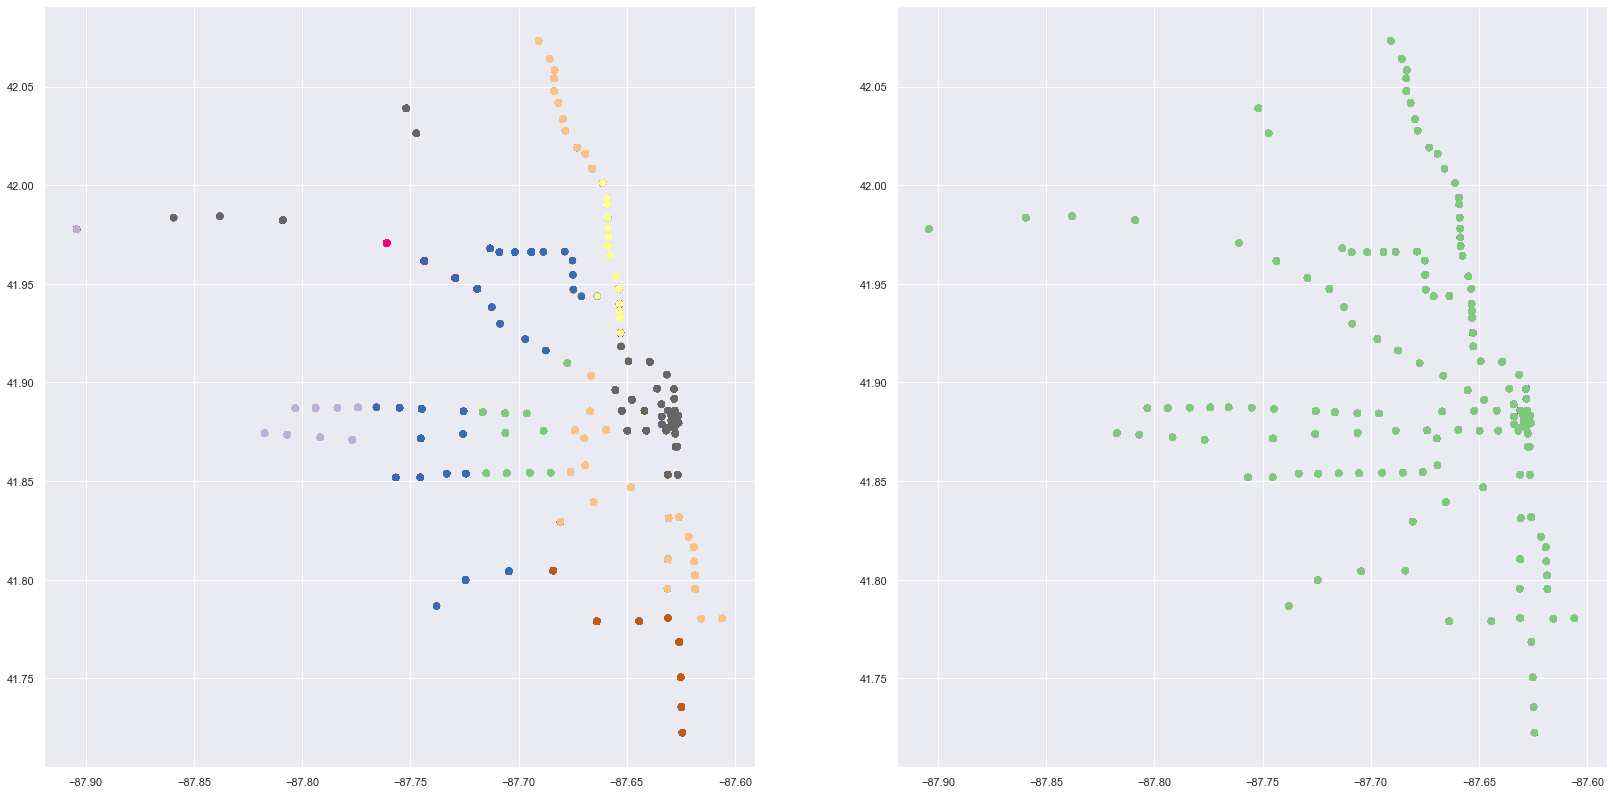

In [11]:
plt.figure(figsize=(28,14))
plt.subplot(1,2,1)
plt.scatter(df.long, df.lat, c=df.cluster, cmap="Accent");
plt.subplot(1,2,2)
plt.scatter(df.long, df.lat,c= df.month_total, cmap="Accent");

#### **KMeans Clustering II**

In [12]:
X_all = train[['avg_weekday_rides','avg_saturday_rides', 'avg_sunday-holiday_rides', 
                    'month_total', 'lat', 'long',]]
sc = StandardScaler()
X_all_scaled = sc.fit_transform(X_all)

In [14]:
%%time
# GridSearch to find the best number of cluster
all_list = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_all_scaled)
    inertia = cl.inertia_
    sil = silhouette_score(X_all_scaled, cl.labels_)
    all_list.append([k, inertia, sil])
    
all_df = pd.DataFrame(all_list)
all_df.columns = ['k', 'inertia', 'silhouette']           

MemoryError: Unable to allocate 1.00 GiB for an array with shape (3924, 34197) and data type float64

In [ ]:
all_df.sort_values(by=['silhouette'], ascending=False).head(5)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(all_df.k, all_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(all_df.k, all_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [ ]:
km_all = KMeans(n_clusters=2)
km_all.fit(X_sc)
# Scaled X gives best results
df['cluster_all'] = km_all.labels_

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.scatter(df.long, df.lat, c=df.cluster_all, s=10, cmap="Accent");

#### **KMeans Clustering: Date**

In [ ]:
train.head()

In [ ]:
oh = OneHotEncoder(categories="auto", sparse=False)
train['year'] = pd.to_datetime(train['month_beginning']).dt.year
train['month'] = pd.to_datetime(train['month_beginning']).dt.month
train['year'] = oh.fit_transform(np.array(train['year']).reshape(-1,1))
train['month'] = oh.fit_transform(np.array(train['month']).reshape(-1,1))

In [ ]:
X_date = train[['month_total', 'lat', 'long', 'year', 'month']]
sc = StandardScaler()
X_date_scaled = sc.fit_transform(X_date)

In [ ]:
%%time
# GridSearch to find the best number of cluster
date_list = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_date_scaled)
    inertia = cl.inertia_
    sil = silhouette_score(X_date_scaled, cl.labels_)
    date_list.append([k, inertia, sil])
    
date_df = pd.DataFrame(date_list)
date_df.columns = ['k', 'inertia', 'silhouette']  

In [ ]:
date_df.sort_values(by=['silhouette'], ascending=False).head(5)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(date_df.k, date_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(date_df.k, date_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [ ]:
km_date = KMeans(n_clusters=3)
km_date.fit(X_sc)
# Scaled X gives best results
df['cluster_date'] = km_date.labels_

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.scatter(df.long, df.lat, c=df.cluster_date, s=10, cmap="winter");

#### **KMeans Clustering: Location Only**

In [ ]:
X_loc = train[['lat', 'long']]
sc = StandardScaler()
X_loc_scaled = sc.fit_transform(X_loc)

In [ ]:
%%time
# GridSearch to find the best number of cluster
loc_list = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_loc_scaled)
    inertia = cl.inertia_
    sil = silhouette_score(X_loc_scaled, cl.labels_)
    loc_list.append([k, inertia, sil])
    
loc_df = pd.DataFrame(loc_list)
loc_df.columns = ['k', 'inertia', 'silhouette'] 
loc_df.sort_values(by=['silhouette'], ascending=False).head(10)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(loc_df.k, loc_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(loc_df.k, loc_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [ ]:
km_loc = KMeans(n_clusters=25)
km_loc.fit(X_sc)
# Scaled X gives best results
df['cluster_loc'] = km_loc.labels_

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.scatter(df.long, df.lat, c=df.cluster_loc, s=10, cmap="winter");

#### **KMeans Clustering: Location & Date**

In [ ]:
X_locdate = train[['lat', 'long', 'month', 'year']]
sc = StandardScaler()
X_locdate_scaled = sc.fit_transform(X_locdate)

In [ ]:
%%time
# GridSearch to find the best number of cluster
locdate_list = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_locdate_scaled)
    inertia = cl.inertia_
    sil = silhouette_score(X_locdate_scaled, cl.labels_)
    locdate_list.append([k, inertia, sil])
    
locdate_df = pd.DataFrame(locdate_list)
locdate_df.columns = ['k', 'inertia', 'silhouette'] 
locdate_df.sort_values(by=['silhouette'], ascending=False).head(10)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(locdate_df.k, locdate_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(locdate_df.k, locdate_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [ ]:
km_locdate = KMeans(n_clusters=2)
km_locdate.fit(X_sc)
# Scaled X gives best results
df['cluster_locdate'] = km_locdate.labels_

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.scatter(df.long, df.lat, c=df.cluster_locdate, s=10, cmap="winter");

In [ ]:
df.head()